### Exercício Prático 07 - Integração numérica - Syanne Tavares

### 1 - Escolha 3 funções ao acaso, sendo uma polinomial, outra exponencial e outra senoidal.

In [105]:
import numpy as np
import math
from numpy.linalg import solve
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#### 2 - Calcule a integral numérica dessas funções em 5 pontos (𝑥1 − 𝑥0 ≈ 0) igualmente espaçados;

3 -Utilize esses 5 pontos para fazer um ajuste de curva e
encontrar a integral aproximada para qualquer ponto por meio
da curva encontrada.

4- Mostre a resposta visualmente por meio de um gráfico.

##### Calculo das integrais
1- Regra do trapézio

In [106]:
f = lambda x : math.exp(x)

def trapezio(f,a,b):
  """Função que calcula a regra do trapézio/ integral de uma função f no intervalo [a,b]."""
  h = b - a
  b = (f(a) + f(b))/2
  y = b*h 
  return y

In [107]:
print("e^1 = ",f(1))
x = [0, 1]
print(f" Integral de f no intervalo  [{x[0]} , {x[1]}] = ",trapezio(f,0,1))

e^1 =  2.718281828459045
 Integral de f no intervalo  [0 , 1] =  1.8591409142295225


2- Regra do trapézio repetida

In [108]:
# a = inicio, b = fim, m = iteração
def trapezioR(f, LimInferior, LimSuperior, N_Iteracoes):
  """Função que calcula a regra dos trapézios/ Integral de uma função f no intervalo recebido por parâmetro.\n
  Parâmetros:\n
  f -> Função pro calculo da integral.\n
  LimInferior -> limite inferior da integral\n
  LimSuperior -> limite superior da integral.\n
  N_Interações -> número de iterações."""

  H = LimSuperior-LimInferior
  h = H/N_Iteracoes
  sum = f(LimInferior)+f(LimSuperior)
  sum_aux= 0
  for i in range(1, N_Iteracoes):
    sum_aux+=f(LimInferior+i*h)
  sum += 2*sum_aux
  sum*=h/2
  return sum

In [109]:

print("e^1 = ",f(1))
x = [0, 1]
print(f" Integral de f no intervalo  [{x[0]} , {x[1]}] = ",trapezioR(f,x[0],x[1],1000))

e^1 =  2.718281828459045
 Integral de f no intervalo  [0 , 1] =  1.7182819716491962


In [110]:
def GetIntegral(f, limInf, LimSup, N_pontos):
  """Função que calcula a integral em pontos igualmente espaçados.\n
  Parâmetros:\n
  f -> função pro calculo da integral.\n
  limInf -> limite inferior pro calculo da integral.\n
  limSup -> limite superior pro calculo da integral.\n
  N_pontos -> Número de pontos entre o intervalo.\n
  Retorna uma lista com os valores da integral pros pontos x.\n
  """

  p = 1e-10
  x = np.linspace(limInf, LimSup, N_pontos)
  result = []
  for e in x:
    result.append(trapezioR(f, e, e+p, 10000))

  return result

### Código do ajuste de curva

In [199]:
class MQ:
  def __init__(self):
    self.alfas = []

  def fit_exp(self, x, y,printValues=False):

    self.alfas=[]
    z = np.log(y)# calcula o vetor z ln(y)
    # linearização
    self.fit(x, z, [lambda x:1, lambda x:x]) # calcula os valores de alfa com vetor z g1=1 e g2 = x
    self.alfas[0] = math.e**self.alfas[0] # calcula o a1
    self.alfas[1] = -self.alfas[1] # calcula o a2
    
    if printValues:
      print("Valores do sistema linear Criado:")


  def fit(self,x,y,G,printValues=False):
    """método que calcula os valores deo vetor de alfas.\n
      Parâmetros:\n
      x= vetor de valores de xi tabelados\n
      y= vetor de valores de yi tabelados\n
      G= Vetor com as n funções g1(x),...gn(x), ex: [lambda x:1, lambda x:x,lambda x:x**2].\n\n 
      
      Retorno:\n
      calcula os valores de alfas
      printa os valores dos alfas calculados."""
    self.G=G
    A=[]
    B=[]
    j=0
    for g_lin in G:
      b=0
      for i in range(0,len(x)):
        b+=g_lin(x[i])*y[i]
      B.append(b)
      A.append([])
      for g_col in G:
        a=0
        for i in range(0,len(x)):
          a+=g_lin(x[i])*g_col(x[i])
        A[j].append(a)
      j+=1

    mat = np.append(A, np.array([B]).T,axis=1)
    #Valores do sistema linear Criado.
    self.alfas = solve(A, B)
    
    if printValues:
      print("Valores do sistema linear Criado:")
      print('A: ', A)
      print('B: ', B)
      print('Matriz:\n', mat)
      print(f"Alfas: {self.alfas}")

  def calc(self, x):
    """Calcula o somatório do valor de x aplicado em cada função vo vetor de funções g."""
    s = 0
    # print(self.alfas)
    for i in range(0,len(self.G)):
      s+=self.alfas[i]*self.G[i](x)
    return s
  
  def calc_exp(self, x):
    """retorna o valor da função phi no ponto x para casos não lineares."""
    # calculo da phi pra um ponto x
    return self.alfas[0]*(math.e**(-self.alfas[1]*x))
  
  def plotPontos(self,x,y):
    """Método que plota o gráfico dos pontos tabelados"""
    plt.plot(x, y,'ro')# plota como pontos
    plt.title('Gráfico dos pontos tabelados')

    plt.grid()
    plt.show()

  def PrintAjusteCurva(self,x,y,Linear=True,NaoLinear=False):
    """Método que mostra o gráfico do ajuste de curva.Os alfas já devem ter sido calculados com o método fit."""
    x_line = np.linspace(min(x)-0.0001, max(x)+0.0001, 100)
    ###############
    graph = go.Figure()
    graph.update_layout(
      title="Ajuste De Curva",
      xaxis_title="X",
      yaxis_title="Y"
    )
    ##############
    if Linear:
      y_line = list(map(lambda x: self.calc(x), x_line))
      plt.plot(x_line,y_line,'g-',label= 'Função linear')
      graph.add_trace(go.Scatter(x=x_line, y=y_line,mode='lines', name='Linear'))
    plt.title('Gráfico Ajuste de Curva')

    if NaoLinear:
      # self.fit_exp(x, y)
      y_nlinear = list(map(lambda x: self.calc_exp(x), x_line))
      plt.plot(x_line,y_nlinear,'b-',label= 'Função Não linear')
      graph.add_trace(go.Scatter(x=x_line, y=y_nlinear,mode='lines', name='Exponecial'))

    plt.plot(x, y,'ro')# plota como pontos 
    plt.legend()
    plt.grid()
    plt.show()
    
    graph.add_trace(go.Scatter(x=x, y=y,mode='markers', name='(x,y)'))
    graph.show()

In [112]:

def plotar_grafico(funcao, intervalo_x,pontos=[],label=""):
    """Plota o gráfico de uma função em determina intervalo.\n
    Parâmetros:\n
    função = função a ser plotada. ex :lambda x: np.sin(x).zn
     Intervalo_x =  Intervalo a ser considerado. ex: (-np.pi, np.pi) """
    x = np.linspace(intervalo_x[0], intervalo_x[1], 1000)  # Gera 100 pontos igualmente espaçados no intervalo x
    y = funcao(x)  # Avalia a função para cada valor de x
    
    pontosDestaquey=funcao(pontos)
    plt.plot(x, y,label=label)  # Plota o gráfico
    
    # Configurações adicionais (opcional)
    plt.xlabel('x')
    plt.ylabel('y')
    if len(pontos) :
        plt.plot(pontos, pontosDestaquey,'ro')# plota como pontos 
    plt.title('Gráfico da função')
    
    plt.grid(True)  # Adiciona linhas de grade ao gráfico
    plt.legend()
    plt.show()  # Mostra o gráfico
# # Exemplo de uso:
# def minha_funcao(x):
#     return np.sin(x)  # Exemplo de função (seno)

# intervalo = (-np.pi, np.pi)  # Exemplo de intervalo de x (-pi a pi)

# plotar_grafico(minha_funcao, intervalo)

## f1 = lambda x: 3*x**3 - 3*x+1

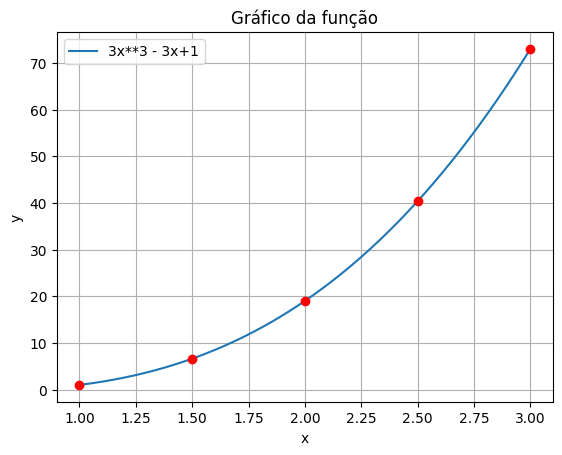

In [194]:
f1 = lambda x: 3*x**3 - 3*x+1
plotar_grafico(f1,(1,3),np.linspace(1,3,5),"3x**3 - 3x+1")


[1.  1.5 2.  2.5 3. ]
[1.0000000830403712e-10, 6.625000549017446e-10, 1.9000001573717034e-09, 4.037500334330498e-09, 7.300000604394711e-09]


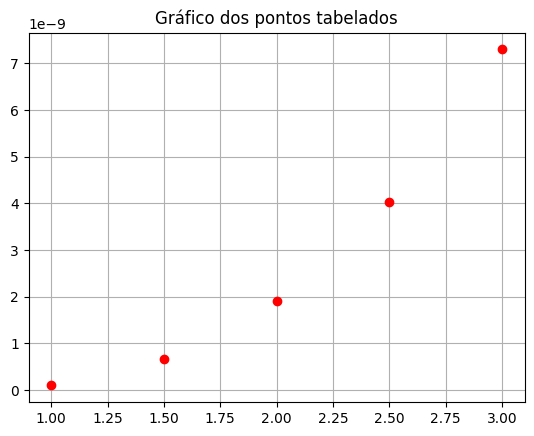

In [195]:
X1 = np.linspace(1,3,5)
Y1 = GetIntegral(f1,1,3,5)
print(X1)
print(Y1)

###### Calulando o ajuste de curva 
mq = MQ()
mq.plotPontos(X1,Y1)

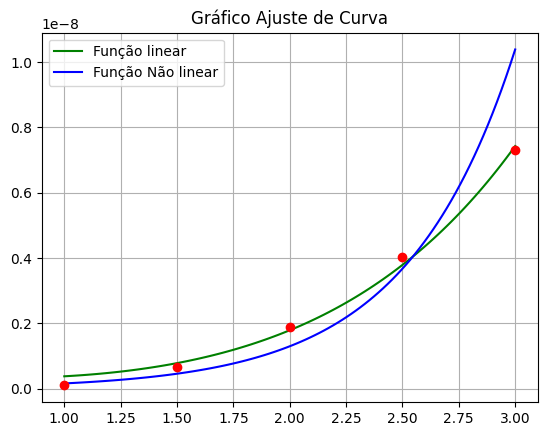

In [200]:
mq.fit(X1,Y1,[lambda x :x,lambda x : np.exp(x)])
mq.PrintAjusteCurva(X1,Y1,Linear=True,NaoLinear=True)

#### f2= lambda x : math.exp(x)


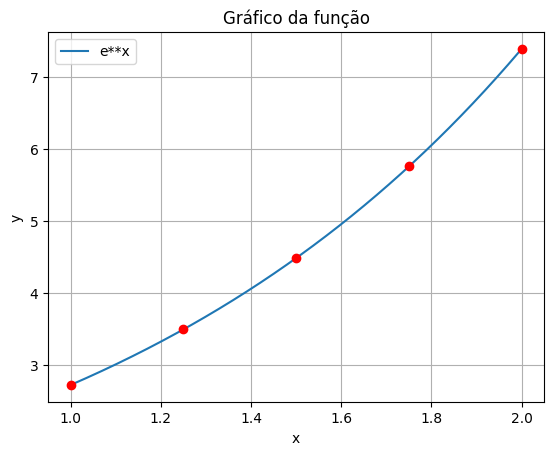

[1.   1.25 1.5  1.75 2.  ]
[2.7182820535066026e-10, 3.490343246428629e-10, 4.4816894413787656e-10, 5.754603152431419e-10, 7.389056710673373e-10]


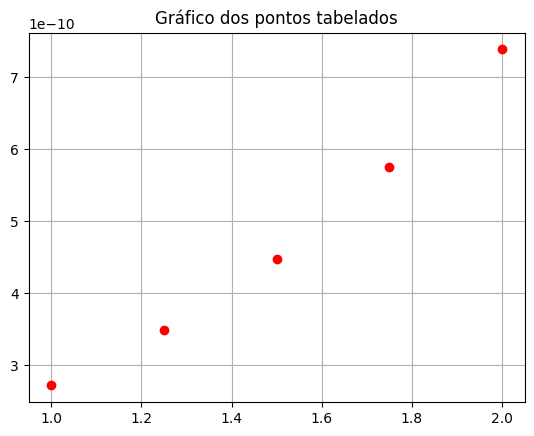

In [158]:
f2 = lambda x: np.exp(x)
X2 = np.linspace(1,2,5)
Y2 = GetIntegral(f2,1,2,5)
plotar_grafico(f2,(1,2),np.linspace(1,2,5),"e**x")

print(X2)
print(Y2)

###### Calulando o auste de curva 
mq = MQ()

mq.plotPontos(X2,Y2)

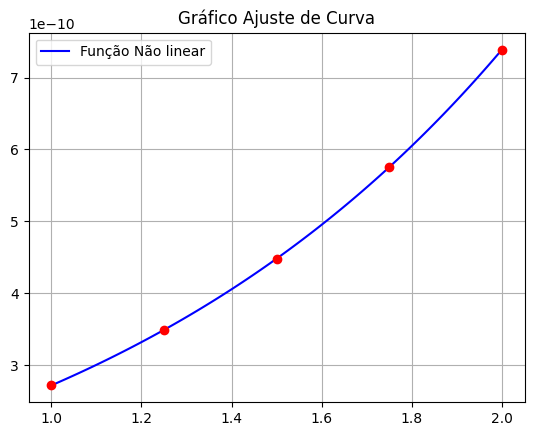

In [159]:
# mq.fit(X2,Y2,[lambda x : x, lambda x : math.exp(x)])
mq.PrintAjusteCurva(X2,Y2,Linear = False,NaoLinear = True)

### Exemplo 3 - f3 = lambda x: np.sin(x)**1/2"

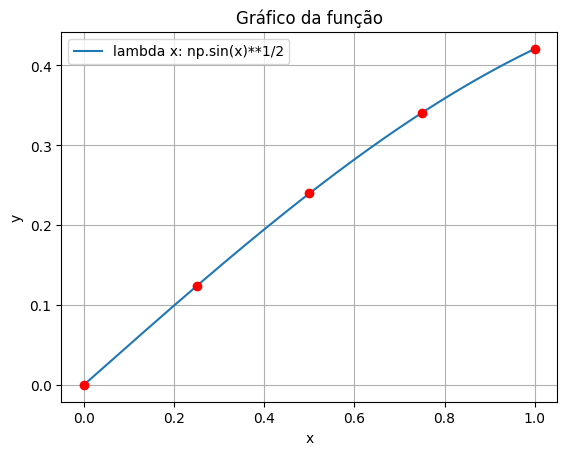

In [184]:
f3 = lambda x: np.sin(x)**1/2

plotar_grafico(f3,(0,1),np.linspace(0,1,5),"lambda x: np.sin(x)**1/2")


[0.   0.25 0.5  0.75 1.  ]
[2.5e-21, 1.2370198988663193e-11, 2.3971278915796465e-11, 3.4081940822948125e-11, 4.207355272292667e-11]


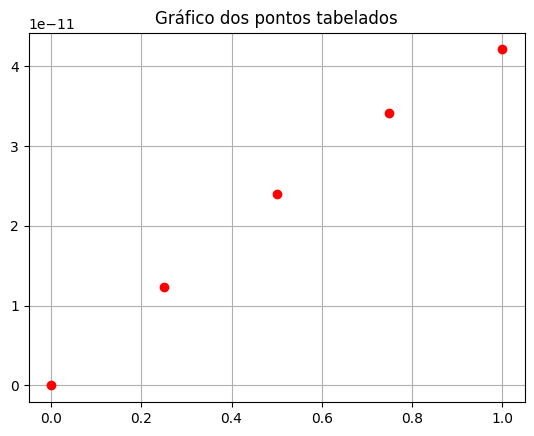

In [185]:
###### Calulando o ajuste de curva dos pontos integralizados
X3 = np.linspace(0,1,5)
Y3 = GetIntegral(f3,0,1,5)

print(X3)
print(Y3)
mq = MQ()

mq.plotPontos(X3,Y3)

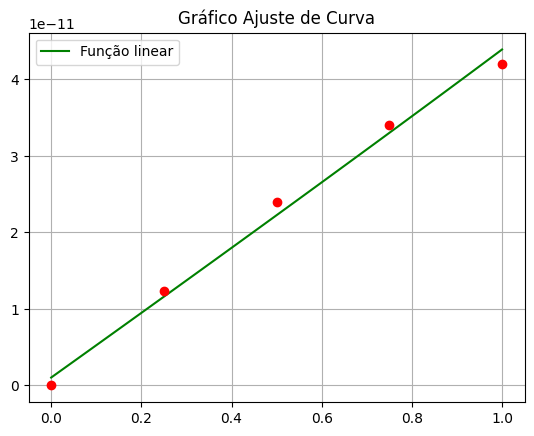

In [192]:
mq.fit(X3,Y3,[lambda x : x,lambda x : math.exp(x)])
mq.PrintAjusteCurva(X3,Y3,Linear=True)